In [1]:
import collections
import torch
import torchvision
import torchvision.transforms as transforms


bs = 32
num_workers = 4

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


loaders = collections.OrderedDict()

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True,
    download=True, transform=data_transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=bs,
    shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False,
    download=True, transform=data_transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=bs,
    shuffle=False, num_workers=num_workers)

loaders["train"] = trainloader
loaders["valid"] = testloader


Files already downloaded and verified
Files already downloaded and verified


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
for x, y in trainloader:
    break

In [4]:
type(x), x.size()

(torch.Tensor, torch.Size([32, 3, 32, 32]))

In [5]:
type(y), y.size()

(torch.Tensor, torch.Size([32]))

In [6]:
device = 'cuda:1'

In [8]:
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
from tqdm import tqdm

In [10]:
losses = []
for i in range(10):
    for x, y in tqdm(trainloader):
        forward = model(x.to(device))
        loss = criterion(forward, y.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().data.numpy())

100%|██████████| 1563/1563 [00:06<00:00, 226.47it/s]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

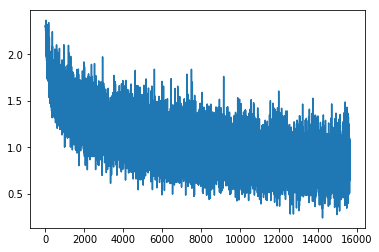

In [12]:
plt.plot(np.arange(len(losses)), losses)
plt.show()

In [4]:
from catalyst.dl.experiments import SupervisedRunner

# experiment setup
num_epochs = 10
logdir = "./logs/cifar_simple_notebook_1"

# model, criterion, optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# model runner
runner = SupervisedRunner()

In [5]:
# model training
runner.train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    loaders=loaders,
    logdir=logdir,
    num_epochs=num_epochs,
    verbose=True
)

0/10 * Epoch (train): 100% 1563/1563 [00:10<00:00, 152.09it/s, _timers/_fps=5769.580, loss=1.244] 
0/10 * Epoch (valid): 100% 313/313 [00:01<00:00, 258.08it/s, _timers/_fps=24200.816, loss=1.265]
[2019-05-31 10:46:06,809] 
0/10 * Epoch 0 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=12859.5752 | _timers/batch_time=0.0026 | _timers/data_time=0.0018 | _timers/model_time=0.0008 | loss=1.5828
0/10 * Epoch 0 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=14520.0132 | _timers/batch_time=0.0025 | _timers/data_time=0.0019 | _timers/model_time=0.0006 | loss=1.3471
1/10 * Epoch (train): 100% 1563/1563 [00:10<00:00, 148.11it/s, _timers/_fps=12672.810, loss=1.373]
1/10 * Epoch (valid): 100% 313/313 [00:01<00:00, 254.99it/s, _timers/_fps=14267.857, loss=1.172]
[2019-05-31 10:46:18,643] 
1/10 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=12145.7063 | _timers/batch_time=0.0027 | _timers/data_time=0.0019 | _timers/model_time=0.0008 | loss=